# **Table Of Contents**


1. [Import Libraries](#import-libraries)
2. [Query SQL](#Query-sql)
3. [Data Loading](#data-loading)
4. [EDA I](#eda-I)
5. [Feature Engineering](#feature-engineering)
    - [Missing Value](#missing-value)
    - [Outlier Handling](#outlier-handling)
    - [Feature Scaling](#feature-scaling)
    - [Dimensionality Reduction](#Dimensionality-Reduction)
6. [Principal Component Analysis](#principal-component-analysis)
7. [Clustering](#clustering)
8. [Model Definition](#model-definition)
9. [Model Training](#model-training)
10. [EDA II](#eda-II)
11. [Model Saving](#model-saving)



---

## <a id="import-libraries">**1. Import Libraries**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/4911/4911643.png" width="64" align="center"/></a>

---

In [1]:
# Import Library

# Library Dataframe
import pandas as pd

# Library Numerical Data
import numpy as np

# Library Statistic
from scipy import stats
from sklearn import metrics
from scipy.stats import uniform, randint


# Library Data Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Library Preprocessing data
from sklearn.preprocessing import RobustScaler

# Library Outlier Handling
from feature_engine.outliers import Winsorizer

# Library Correlation
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.metrics import calinski_harabasz_score

# Library Machine Learning Model
from sklearn.cluster import KMeans

# Save Model
import pickle
import joblib
import json

# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")

## 2. Query SQL
mengambil dataset dari BigQuery 

``` python 
from google.colab import auth
from google.cloud import bigquery

# Authenticate the user
auth.authenticate_user()
print('Authenticated')

# Set up the BigQuery client
project_id = "the-condition-424301-m6"
client = bigquery.Client(project=project_id)

query = '''
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_017_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) != 0;
'''


# Fetch the data into a dataframe
df = client.query(query).to_dataframe()

# Save the DataFrame to a CSV file
csv_filename = 'P1G6_Set_1_vicky_belario.csv'
df.to_csv(csv_filename, index=False)


```



---

## <a id="data-loading">**3. Data Loading**</a> <a style="float:right; margin-right: 15px"><img src="https://icons.veryicon.com/png/128/business/commercial-plain-blue-collection/wd-accent-data-clock.png" alt="drawing" width="64" align="center"/></a>

---

In [ ]:
# Membaca data dari file CSV
df_credit = pd.read_csv("bank_customer.csv")

In [ ]:
# Membuat salinan dari dataframe df_credit
credit = df_credit.copy()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Menampilkan sepuluh baris pertama dari DataFrame
df_credit.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

In [ ]:
# Menampilkan sepuluh baris terakhir dari DataFrame
df_credit.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

In [ ]:
# Menampilkan informasi umum tentang DataFrame
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [ ]:
# Menampilkan statistik deskriptif dari DataFrame
print(df_credit.describe())

           CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4475.000000   1563.205717           0.876933   1003.251343   
std    2583.931114   2072.045789           0.238222   2060.034730   
min       1.000000      0.000000           0.000000      0.000000   
25%    2238.000000    124.432849           0.888889     39.560000   
50%    4475.000000    871.355430           1.000000    360.000000   
75%    6712.000000   2047.570799           1.000000   1102.420000   
max    8949.000000  18495.558550           1.000000  41050.400000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         596.369893              407.110215    984.288554   
std         1653.425984              880.799744   2060.448056   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      

In [ ]:
# Menampilkan jumlah baris duplikat dalam DataFrame
print(df_credit.duplicated().sum())

0


In [ ]:
for column in df_credit.columns:
    print('Number of unique value in the variable {:<25}: {}'.format(column, len(df_credit[column].unique())))


Number of unique value in the variable CUST_ID                  : 4475
Number of unique value in the variable BALANCE                  : 4433
Number of unique value in the variable BALANCE_FREQUENCY        : 43
Number of unique value in the variable PURCHASES                : 3203
Number of unique value in the variable ONEOFF_PURCHASES         : 2093
Number of unique value in the variable INSTALLMENTS_PURCHASES   : 2292
Number of unique value in the variable CASH_ADVANCE             : 2169
Number of unique value in the variable PURCHASES_FREQUENCY      : 46
Number of unique value in the variable ONEOFF_PURCHASES_FREQUENCY: 45
Number of unique value in the variable PURCHASES_INSTALLMENTS_FREQUENCY: 47
Number of unique value in the variable CASH_ADVANCE_FREQUENCY   : 51
Number of unique value in the variable CASH_ADVANCE_TRX         : 52
Number of unique value in the variable PURCHASES_TRX            : 150
Number of unique value in the variable CREDIT_LIMIT             : 158
Number of un

mengecek jumlah unique value di setiap variable


---

## <a id="exploratory-data-analysis">**4. EDA I (Exploratory Data Analysis)**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/272/272369.png" alt="drawing" width="64" align="center"/></a>

---

EDA I dilakukan sebelum pembuatan model clustering untuk memahami karakteristik data 


<Axes: xlabel='PAYMENTS', ylabel='PURCHASES'>

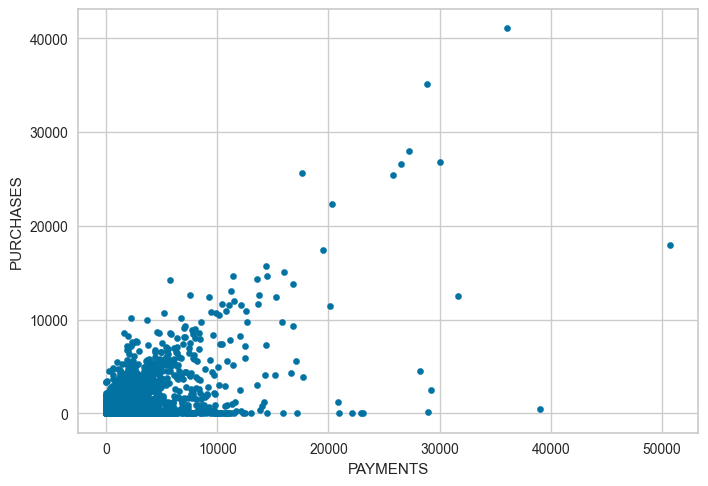

In [ ]:
df_credit.plot(kind='scatter',x='PAYMENTS',y='PURCHASES')

<Axes: ylabel='Frequency'>

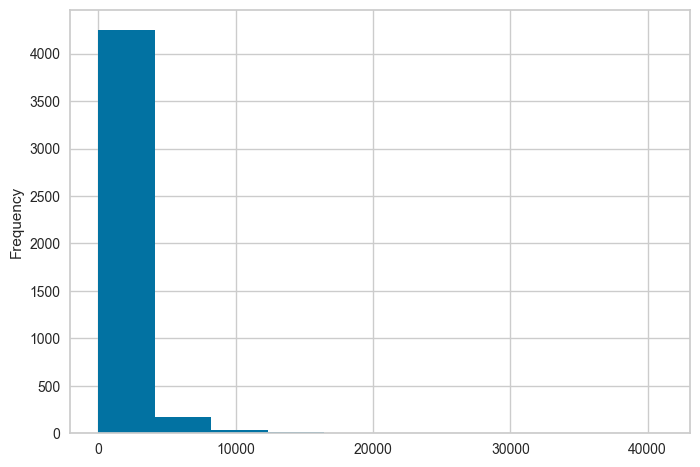

In [ ]:
df_credit['PURCHASES'].plot(kind='hist')

<Axes: xlabel='TENURE', ylabel='CUST_ID'>

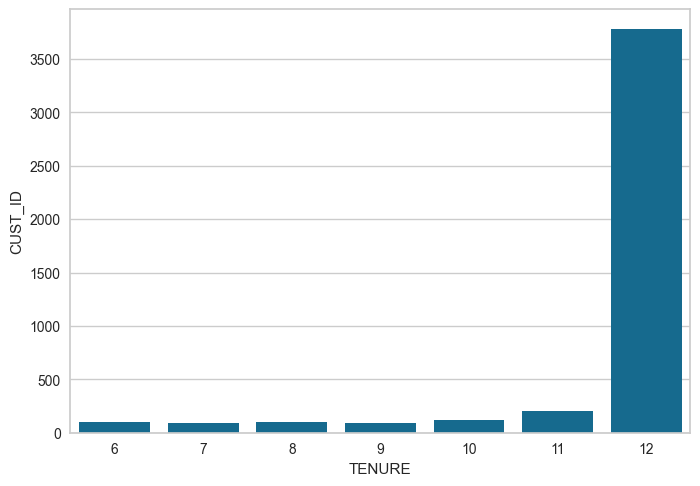

In [ ]:
sns.barplot(df_credit.groupby('TENURE')['CUST_ID'].count())

terlihat pengguna ada di tenure 12 


---

## <a id="feature-engineering">**5. Feature Engineering**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/256/2861/2861721.png" alt="drawing" width="64" align="center"/></a>

---

karena pembuatan model adalah clustering maka tidak perlu melakukan pemisahan data train dan data test (split train-test) pada dataset, maka proses pembuatan model setelah EDA I dilanjut ke bagian missing value handling


---

## <a id="missing-value">**A. Missing Value Handling**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/8921/8921125.png" alt="drawing" width="64" align="center"/></a>

---

In [ ]:
# Menampilkan jumlah nilai kosong (null) dalam setiap kolom DataFrame
print(df_credit.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


diketahui bahwa dataset memiliki missing value di variabel MINIMUM_PATMENTS

In [ ]:
# Menghitung persentase nilai kosong (null) dalam setiap kolom DataFrame
missing_percentage = df_credit.isnull().mean() * 100

print(missing_percentage)

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000000
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.463687
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64


diketahui persentasi nilai kosong nya adalah 3.4 % di kolom MINIMUM_PAYMENTS

karena nilai persentase tidak begitu besar maka handling missing value akan dilakukan dengan menghapus missing value pada variabel MINIMUM_PAYMENTS

In [ ]:
# Menghapus baris yang mengandung nilai NaN dari DataFrame
df_credit.dropna(inplace=True) 

dikarenakan model yang nanti akan digunakan adalah KMeans, dan karena KMeans hanya dapat melakukan clustering pada fitur numerik, maka kolom kategorikal akan sementara dihapus. Setelah proses clustering selesai, kolom ini akan digunakan kembali.

In [ ]:
 # Menghapus kolom kategorikal dari DataFrame
df = df_credit.drop(['CUST_ID', 'TENURE'], axis=1)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2      757.964752              0.875      157.4             157.4   
3      264.566591              0.375     1150.0            1150.0   
4      440.613643              1.000      600.0             600.0   
5      611.561026              1.000      765.0             765.0   
7      105.333584              0.375      306.0             306.0   
...           ...                ...        ...               ...   
4470  9629.808851              1.000        0.0               0.0   
4471  1040.030221              1.000        0.0               0.0   
4472  1322.818587              1.000        0.0               0.0   
4473  1060.391273              1.000        0.0               0.0   
4474  3447.674222              1.000      205.0             205.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
5                        0.0      0.000000             0.125000   
7                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
5                       0.125000                               0.0   
7                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
5                   0.000000                 0              1        2000.0   
7                   0.000000                 0              2        6000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
2     1494.480376       2638.598410               0.0  
3     3029.380326         85.428885               0.0  
4      215.316424        137.846006               0.0  
5      204.464151        146.352314               0.0  
7      101.986927        118.324082               0.0  
...           ...               ...               ...  
4470  2468.988022       2134.295731               0.0  
4471   290.129620        287.994171               0.0  
4472  1035.627320        312.835530               0.0  
4473   407.360560        2


---

## <a id="outlier-handling">**B. Outlier Handling**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/9850/9850870.png" alt="drawing" width="64" align="center"/></a>

---

- oulier handling dilakukan hanya pada variabel numerik.
- karena sebelumnya fitur kategorikal sudah dihapus maka dataset yang sekarang hanya berisi fitur numerikal saja. jadi tidak perlu memisahkan data menjadi kolom kategorikal dan numerikal
- sebelum melakukan outlier handling dilakukan pengecekan distribusi pada dataset 

In [ ]:
# Membuat list untuk data dan kolom yang berdistribusi normal
data_normal = []
column_normal = []

# Membuat list untuk data dan kolom yang berdistribusi skewed
data_skewed = []
column_skewed = []

# For loop untuk setiap kolom numerik guna memfilter distribusi data menjadi kolom yang berdistribusi normal atau skewed
for num in df:
    skewness = df[num].skew()  # Menghitung skewness dari kolom

    # Jika data berdistribusi normal
    if skewness <= 0.5 and skewness >= -0.5:
        column_normal.append(num)  # Menambahkan kolom ke list kolom berdistribusi normal
        data_normal.append([num, skewness])  # Menambahkan kolom dan skewness ke list data berdistribusi normal

    # Jika data memiliki skewness negatif tinggi
    elif skewness < -1:
        column_skewed.append(num)  # Menambahkan kolom ke list kolom berdistribusi skewed
        data_skewed.append([num, skewness, 'high'])  # Menambahkan kolom, skewness, dan keterangan 'high' ke list data berdistribusi skewed

    # Jika data memiliki skewness positif tinggi
    elif skewness > 1:
        column_skewed.append(num)  
        data_skewed.append([num, skewness, 'high']) 

    # Jika data memiliki skewness negatif rendah
    elif skewness <= -0.5 and skewness > -1:
        column_skewed.append(num)  # Menambahkan kolom ke list kolom berdistribusi skewed
        data_skewed.append([num, skewness, 'low'])  # Menambahkan kolom, skewness, dan keterangan 'low' ke list data berdistribusi skewed

    # Jika data memiliki skewness positif rendah
    elif skewness >= 0.5 and skewness < 1:
        column_skewed.append(num) 
        data_skewed.append([num, skewness, 'low'])  

In [ ]:
# Menampilkan kolom yang berdistribusi normal
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

normal_distribution  skewness
0               PURCHASES_FREQUENCY  0.030477
1  PURCHASES_INSTALLMENTS_FREQUENCY  0.489101

In [ ]:
# Menampilkan kolom yang berdistribusi skewed
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

skewed_distribution   skewness  rate
0                      BALANCE   2.306056  high
1            BALANCE_FREQUENCY  -2.085656  high
2                    PURCHASES   6.982698  high
3             ONEOFF_PURCHASES   9.827307  high
4       INSTALLMENTS_PURCHASES   6.252820  high
5                 CASH_ADVANCE   5.611537  high
6   ONEOFF_PURCHASES_FREQUENCY   1.514243  high
7       CASH_ADVANCE_FREQUENCY   1.802858  high
8             CASH_ADVANCE_TRX   6.352409  high
9                PURCHASES_TRX   4.694067  high
10                CREDIT_LIMIT   1.487941  high
11                    PAYMENTS   5.720099  high
12            MINIMUM_PAYMENTS  14.669771  high
13            PRC_FULL_PAYMENT   1.918902  high

In [ ]:
# Metode Capping untuk Distribusi Skewed
winsorizer_skewed = Winsorizer(capping_method='iqr',  # Menggunakan metode capping Interquartile Range (IQR)
                               tail='both',           # Menerapkan capping pada kedua sisi (atas dan bawah) distribusi
                               fold=1.5,              # Nilai fold untuk menentukan batas capping
                               variables=column_skewed)  

# Fit dan Transformasi 
df_capped = winsorizer_skewed.fit_transform(df)  # Menerapkan fit dan transformasi pada DataFrame


## C. Feature Scaling

In [ ]:
# Inisialisasi MinMaxScaler
scaler = RobustScaler()

# Fit_transform 
df_scaled = scaler.fit_transform(df_capped)

## D. Dimensionality Reduction 


- Dimensionality reduction dilakukan untuk mengurangi jumlah fitur atau dimensi dalam sebuah dataset sambil mempertahankan sebanyak mungkin informasi yang relevan.
- reduksi dimensi  menyederhanakan dataset yang kompleks, sehingga lebih mudah dikelola, diinterpretasikan, dan lebih efisien secara komputasi, sambil potensial meningkatkan kinerja model dan mengurangi risiko overfitting.
- Dimensi input yang lebih sedikit seringkali sesuai dengan model yang lebih sederhana, Model dengan dimensi yang lebih besar cenderung lebih rentan terhadap overfitting. 
- maka dari itu diinginkan untuk memiliki model yang lebih umum, dengan data input yang memiliki sedikit fitur.

## 6. Principal Component Analysis (PCA)

Sebelum melakukan clustering, reduksi dimensionalitas akan dilakukan menggunakan PCA

- PCA digunakan untuk mengubah dataset dengan banyak fitur yang berkorelasi menjadi dataset baru dengan fitur yang tidak berkorelasi secara linear. 
- Proses ini melibatkan pencarian sumbu-sumbu ortogonal di mana data memiliki variasi terbesar. 
- Setiap sumbu ini mewakili apa yang disebut sebagai Komponen Utama (Principal Component) yang membawa informasi yang paling signifikan dari dataset asli. 
- PCA memilih dan mengurutkan sumbu-sumbu ini untuk menggambarkan variasi data secara efisien, membantu mengidentifikasi pola dan hubungan yang penting dalam data yang kompleks. berikan versi point

cara kerja PCA

- Sebelum menerapkan PCA, penting untuk standarisasi data sehingga memiliki rata-rata nol dan varians satuan. Hal ini memastikan bahwa fitur-fitur dengan skala yang lebih besar tidak mendominasi analisis.
- Hitung Matriks Kovariansi dari data yang telah distandarisasi untuk memahami hubungan antara fitur.
- Hitung Vektor Eigen dan Nilai Eigen. Vektor eigen mewakili komponen utama, dan nilai eigen mewakili jumlah varians yang dijelaskan oleh setiap komponen.
- Urutkan Vektor Eigen berdasarkan Nilai Eigen. menentukan urutan pentingnya komponen utama
- Pilih Komponen Utama. Pilih k vektor eigen teratas (komponen utama) yang menangkap jumlah varians yang diinginkan. Komponen ini akan membentuk ruang fitur baru berdimensi lebih rendah.
- Transformasi Data. 

In [ ]:
# Inisialisasi Principal Component Analysis (PCA)
pca = PCA()  # Menginisialisasi objek PCA

# Fit PCA dengan data yang telah diskalakan
pca.fit(df_scaled)  # Menerapkan fit pada df_scaled untuk menghitung komponen utama


PCA()

Text(0, 0.5, 'Explained Variance Ratio - Cumulative')

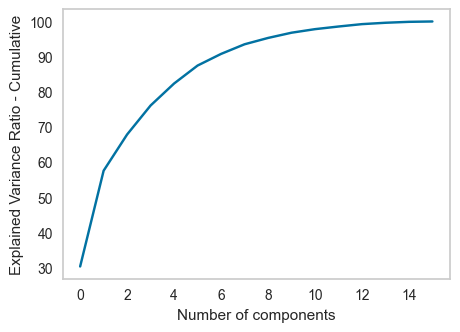

In [ ]:
# Plot Cumulative Explained Variance Ratio
plt.figure(figsize=[5, 3.5])  # Mengatur ukuran figure
plt.grid()  # Menambahkan grid pada plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))  # Plot kumulatif dari rasio varians 
plt.xlabel('Number of components')  
plt.ylabel('Explained Variance Ratio - Cumulative')  


Text(0, 0.5, 'Eigenvalues')

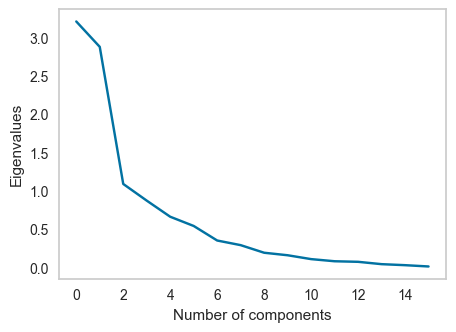

In [ ]:
# Plot Eigenvalues
plt.figure(figsize=[5, 3.5])  
plt.grid()  
plt.plot(pca.explained_variance_)  # Plot eigenvalues
plt.xlabel('Number of components')  # Menambahkan label sumbu-x
plt.ylabel('Eigenvalues')  # Menambahkan label sumbu-y

In [ ]:
# Memeriksa jumlah fitur jika ingin mempertahankan 95% informasi

cumsum = np.cumsum(pca.explained_variance_ratio_)  # Menghitung kumulatif dari rasio varians yang dijelaskan
num_features = np.argmax(cumsum >= 0.95) + 1  # Menemukan jumlah fitur yang dibutuhkan untuk mempertahankan setidaknya 95% informasi
num_features 

9

setelah dilakukan pca mengurangi fitur dari 18 fitur, diambil fitur dengan 95% informasi

In [ ]:
pca.explained_variance_ratio_

array([0.3035966 , 0.27225886, 0.10294688, 0.08235652, 0.06245746,
       0.05106342, 0.03309608, 0.02737667, 0.01799447, 0.01489465,
       0.01011922, 0.00748737, 0.00678723, 0.00388829, 0.00263896,
       0.00103733])

In [ ]:
# Melatih model dengan 95% informasi dataset asli

pca = PCA(n_components=0.95)  # Menginisialisasi PCA dengan mempertahankan 95% informasi
pca.fit(df_scaled)  # Melatih PCA dengan data yang telah diskalakan
df_scaled_pca = pca.transform(df_scaled)  # Mentransformasi data dengan PCA yang telah dilatih


## 7. Clustering

Clustering membagi titik data atau sampel ke dalam sejumlah kelompok berdasarkan karakteristik mereka, sehingga titik data yang mirip berada dalam kelompok yang sama. Clustering termasuk Unsupervised Learning, sehingga tidak memerlukan label.

Jenis algoritma clustering berdasarkan cara kerjanya dapat berbasis centroid dimana titik data diberikan ke centroid (pusat cluster) terdekat berdasarkan metrik jarak. <br> Contohnya algoritma K-Means

Pemilihan K bersifat subjektif. Sering kali merupakan praktik yang baik untuk mencoba beberapa metode dan memvalidasi K yang dipilih dengan menilai kualitas cluster yang dihasilkan.

## A. Elbow Method

Ada beberapa metode dan teknik untuk membantu menentukan cluster optimal:

tahapan Elbow method:
- melakukan plot Within-Cluster Sum of Squares (WCSS). <br>
WCSS adalah fungsi biaya terhadap nilai K yang berbeda. WCSS mengukur varian total dalam setiap cluster. 
Nilainya akan turun seiring dengan peningkatan K karena cluster yang lebih kecil dapat menyesuaikan titik data lebih dekat.

- Cari titik "siku" pada plot di mana laju penurunan WCSS mulai melambat. <br>
Titik ini menunjukkan K yang optimal potensial. metode siku tidak selalu pasti, dan pilihan K dapat bersifat subjektif.

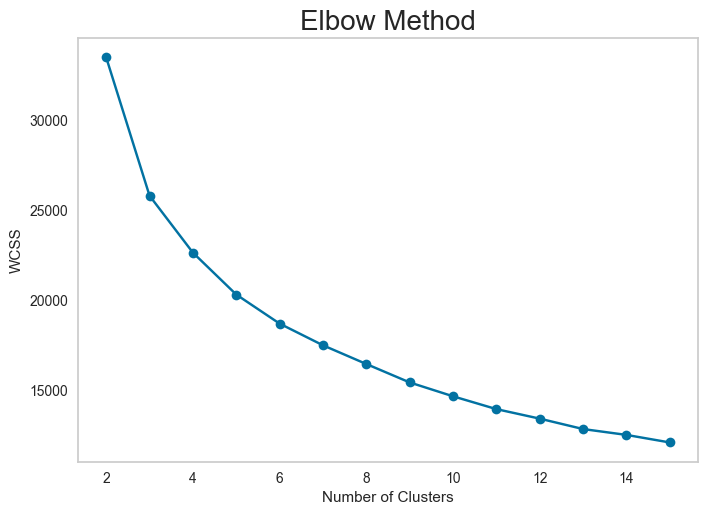

In [ ]:
# Mencari jumlah cluster optimal menggunakan Metode Elbow

wcss = []  # Inisialisasi list untuk menyimpan Within-Cluster Sum of Squares (WCSS)
random_state = 10  # Inisialisasi nilai random_state untuk konsistensi hasil
max_cluster = 15  # Jumlah maksimum cluster yang akan dievaluasi

# Loop untuk mencari WCSS untuk setiap jumlah cluster dari 2 hingga max_cluster
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters=i,         # Jumlah cluster yang dievaluasi
                init='k-means++',      # Metode inisialisasi centroid (k-means++)
                max_iter=300,          # Jumlah iterasi maksimum dalam setiap run
                n_init=10,             # Jumlah inisialisasi centroid yang berbeda
                random_state=random_state)  # Seed untuk inisialisasi centroid yang konsisten
    km.fit(df_scaled_pca)  # Melatih model KMeans dengan data yang telah ditransformasi PCA
    wcss.append(km.inertia_)  # Menambahkan nilai WCSS ke dalam list

# Plot Metode Elbow
plt.plot(range(2, max_cluster+1), wcss, marker="o")  # Plot jumlah cluster vs. WCSS
plt.grid()
plt.title('Elbow Method', fontsize=20)  
plt.xlabel('Number of Clusters')  
plt.ylabel('WCSS')  
plt.show()  


## B. intertia

jadi inertia digunakan sebagai ukuran kuantitatif untuk mengevaluasi seberapa baik sebuah klaster, sedangkan metode Elbow adalah pendekatan grafis untuk memilih jumlah klaster yang optimal berdasarkan nilai inertia.

jadi WCSS dan inertia merujuk pada hal yang sama, yaitu Within-Cluster Sum of Squares, yang mengukur seberapa baik titik-titik data dikelompokkan dalam cluster.

jadi K adalah jumlah cluster yang ditetapkan sebelum atau saat menjalankan algoritma KMeans untuk mengelompokkan data.

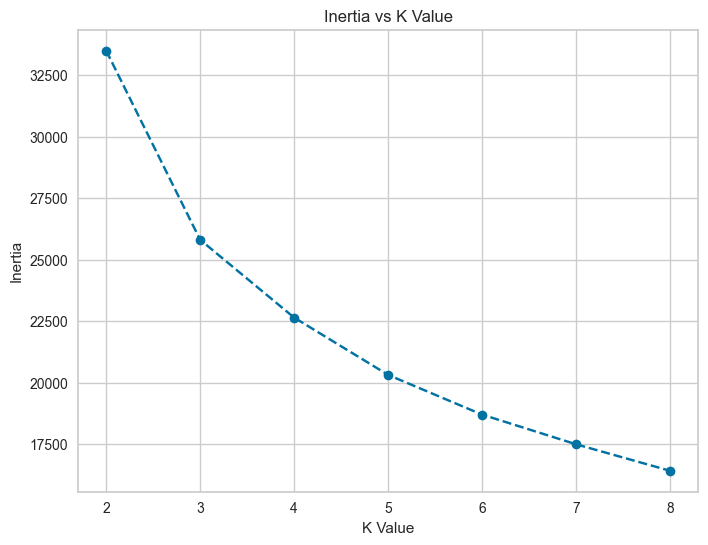

In [ ]:
# Definisikan rentang nilai K yang akan dievaluasi
K = [2, 3, 4, 5, 6, 7, 8]

# Hitung inertia untuk setiap nilai K
inertia = [KMeans(n_clusters=i, n_init=10).fit(df_scaled_pca).inertia_ for i in K]

# Plot hasilnya
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.title('Inertia vs K Value')
plt.grid(True)
plt.show()


Berdasarkan plot di atas, lokasi siku berada di cluster 3. hasil ini dapat dijadikan pertimbangan memilih K dan perlunya untuk melihat metode lain

## C. calinski harabasz score

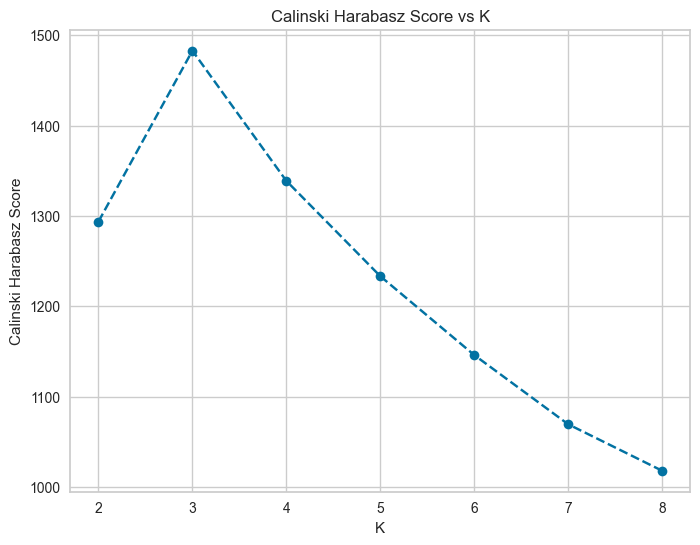

In [ ]:
# Definisikan rentang nilai K yang akan dievaluasi
K = [2, 3, 4, 5, 6, 7, 8]

# Hitung Calinski-Harabasz Index untuk setiap nilai K
ch_index = [calinski_harabasz_score(df_scaled_pca, KMeans(n_clusters=i, n_init=10).fit_predict(df_scaled_pca)) for i in K]

# Plot hasilnya
plt.figure(figsize=(8, 6))
plt.plot(K, ch_index, 'o--')
plt.xlabel('K')
plt.ylabel('Calinski Harabasz Score')
plt.title('Calinski Harabasz Score vs K')
plt.grid(True)
plt.show()


Berdasarkan calinski_harabasz_score K yang tepat berada di cluster 3. di mana titik skor tersebut mencapai nilai maksimum atau di mana peningkatannya mulai melambat secara signifikan setelah peningkatan yang tajam. hasil ini dapat dijadikan pertimbangan memilih K dan perlunya untuk melihat metode lain

## D. silhouette score

langkah Skor Silhouette:

Skor silhouette mengukur seberapa mirip setiap titik data dengan cluster sendiri dibandingkan dengan cluster lainnya.<br>
- Hitung skor silhouette untuk berbagai nilai K.<br>
Skor silhouette yang lebih tinggi menunjukkan cluster yang lebih jelas.<br>

- Pilih nilai K yang memaksimalkan skor silhouette.<br>
Rentang skor silhouette antara -1 hingga 1:<br>
1: Titik-titik teratribusi dengan sempurna dalam sebuah cluster, tanpa tumpang tindih antar cluster.<br>
0: cluster saling tumpang tindih.<br>
-1: Titik-titik mungkin salah teratribusi ke cluster yang salah.<br>

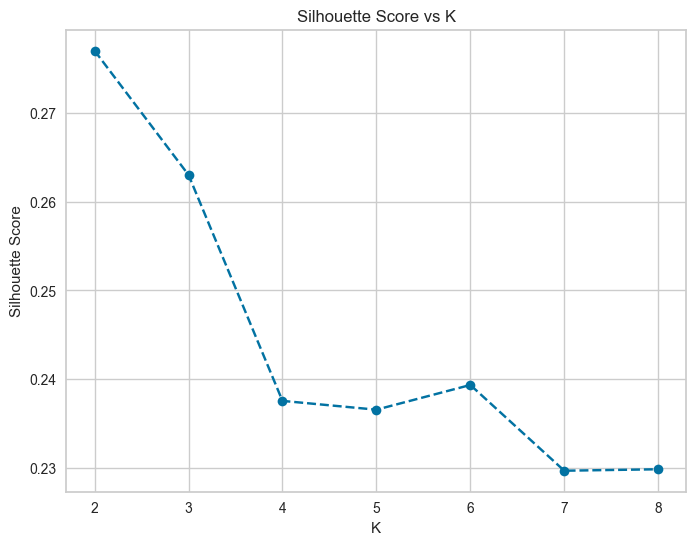

In [ ]:
# Definisikan rentang nilai K yang akan dievaluasi
K = [2, 3, 4, 5, 6, 7, 8]

# Hitung skor Silhouette untuk setiap nilai K
s_score_slc = [silhouette_score(df_scaled_pca, KMeans(n_clusters=i, n_init=10).fit_predict(df_scaled_pca)) for i in K]

# Plot hasilnya
plt.figure(figsize=(8, 6))
plt.plot(K, s_score_slc, 'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.grid(True)
plt.show()


Berdasarkan gambar Silhouette score turun tajam setelah cluster 3 dan mulai stabil di cluster 4 sampai .  hasil Silhouette score akan di konsiderasi bersama dengan hasil Silhouette plot dalam menentukan nilai K

## E. silhouette plot

langkah Plot Silhouette:

- Buat plot silhouette untuk berbagai nilai K.
- Plot silhouette menampilkan skor silhouette untuk setiap titik data dalam clusternya.
- Periksa plot untuk mengidentifikasi nilai K dengan skor silhouette rata-rata tertinggi dan cluster yang terdiferensiasi dengan baik.

In [ ]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.2770716089725099
For n_clusters = 3 The average silhouette_score is : 0.2629949243003379
For n_clusters = 4 The average silhouette_score is : 0.2269954881910396
For n_clusters = 5 The average silhouette_score is : 0.23653827128892319
For n_clusters = 6 The average silhouette_score is : 0.2391867436912543
For n_clusters = 7 The average silhouette_score is : 0.22841003487773787
For n_clusters = 8 The average silhouette_score is : 0.22776650569728513
For n_clusters = 9 The average silhouette_score is : 0.22989190347592348
For n_clusters = 10 The average silhouette_score is : 0.23831598162965037
For n_clusters = 11 The average silhouette_score is : 0.24035092796405888
For n_clusters = 12 The average silhouette_score is : 0.235585547546769
For n_clusters = 13 The average silhouette_score is : 0.24174848662115853
For n_clusters = 14 The average silhouette_score is : 0.2391288494862531


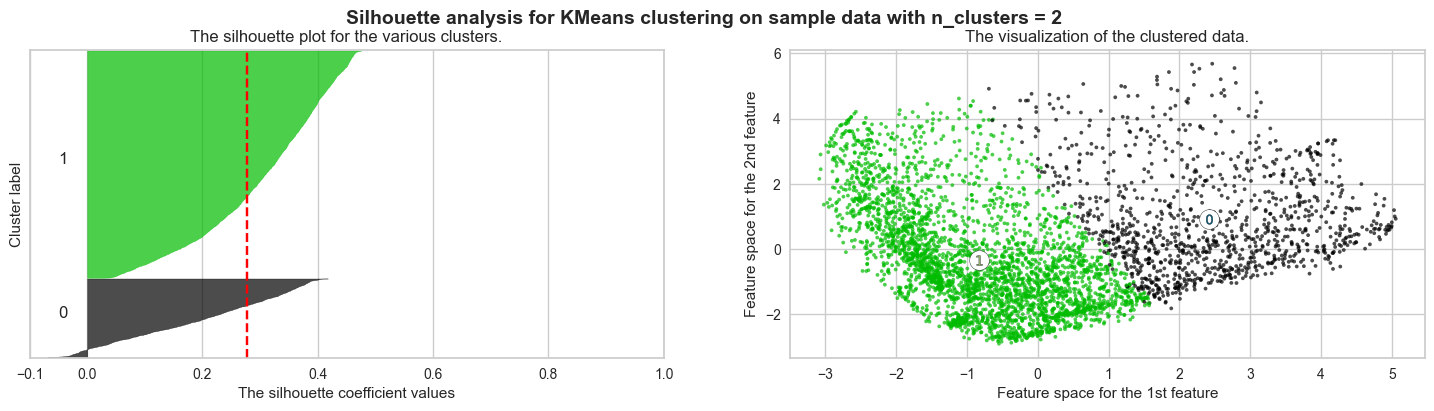

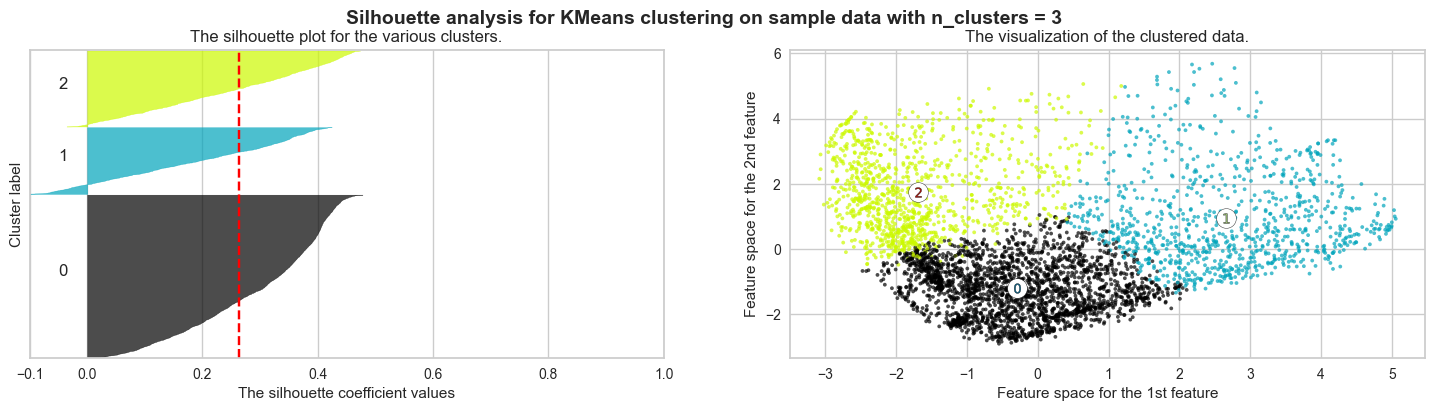

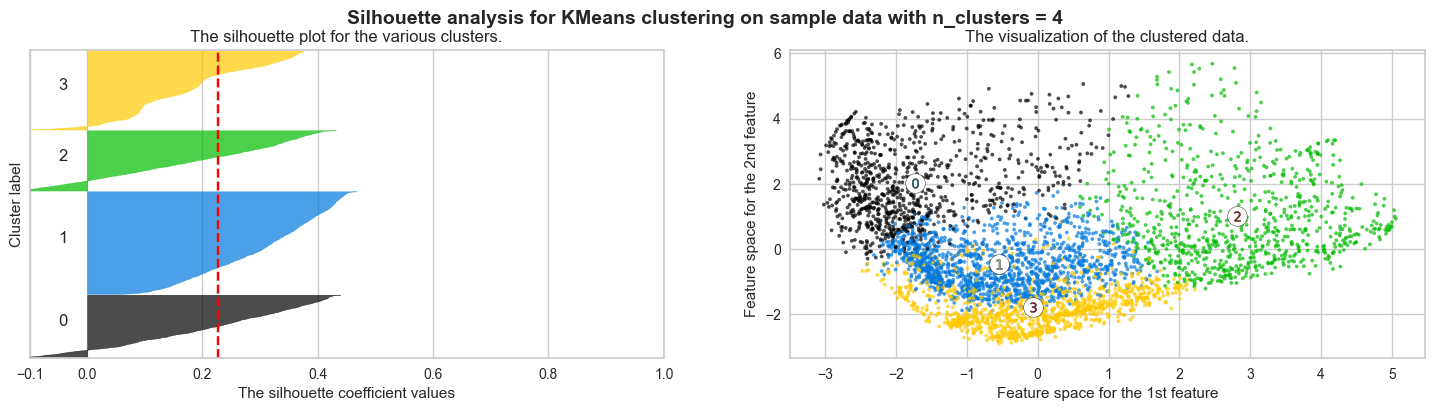

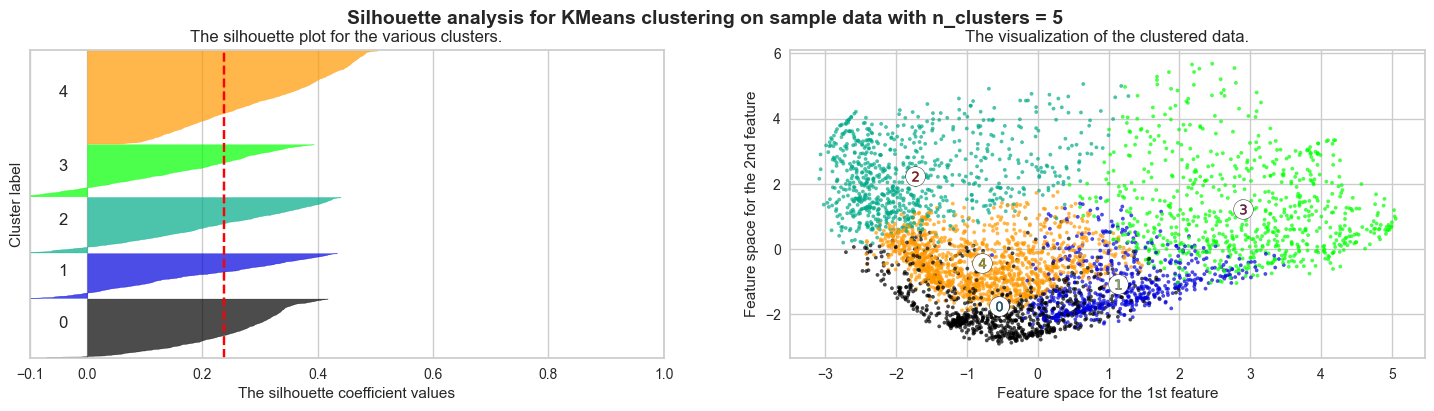

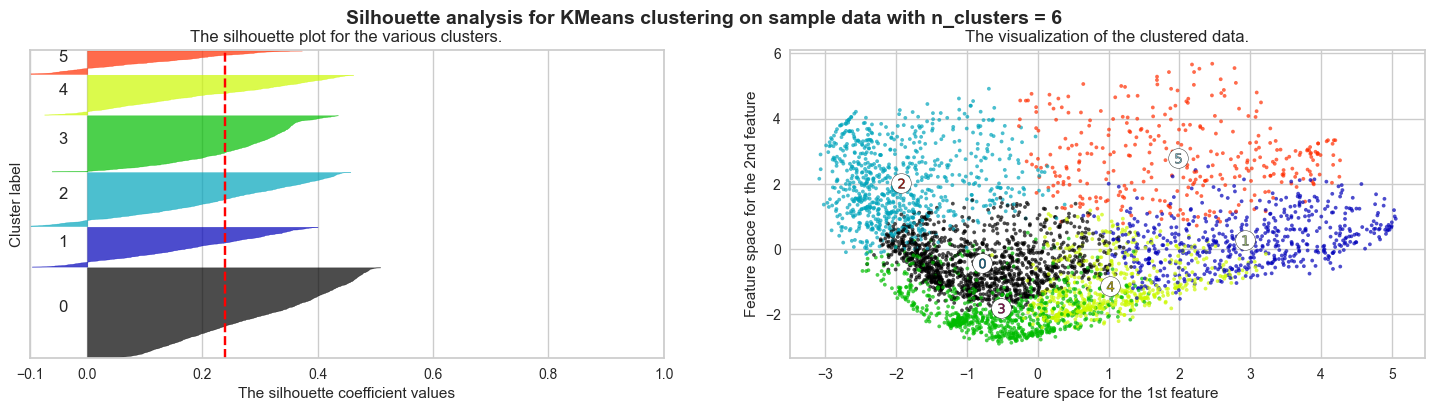

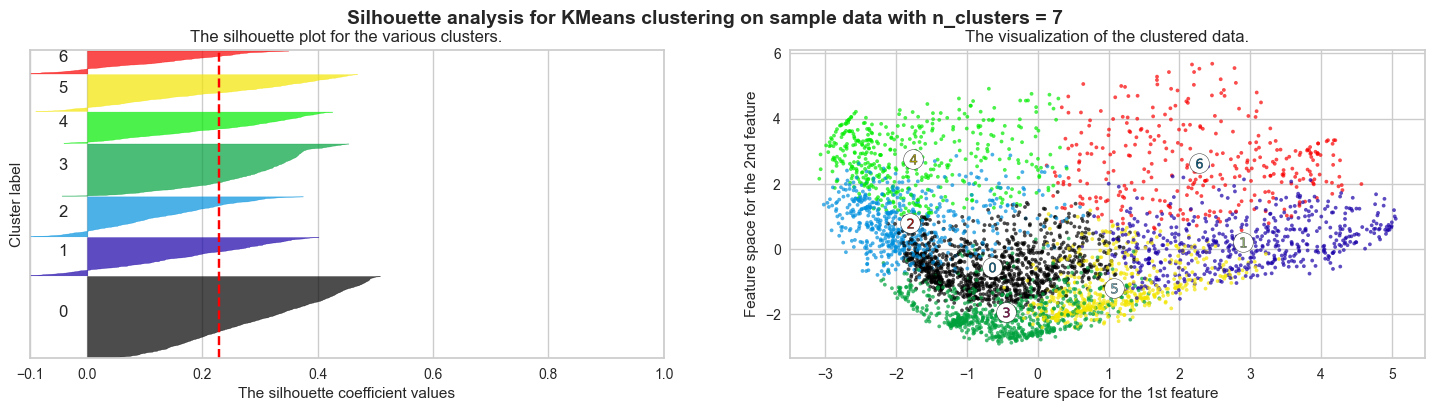

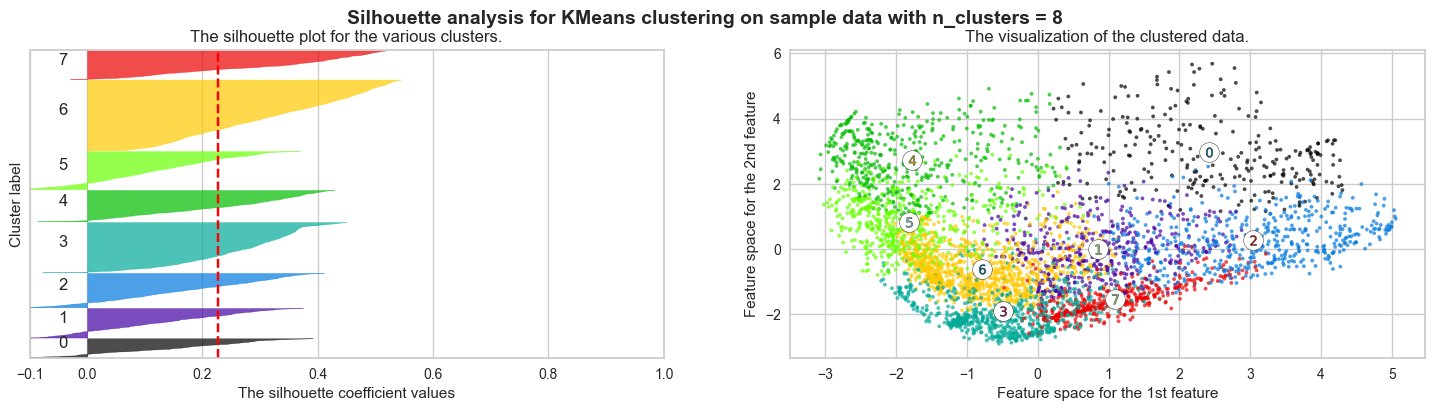

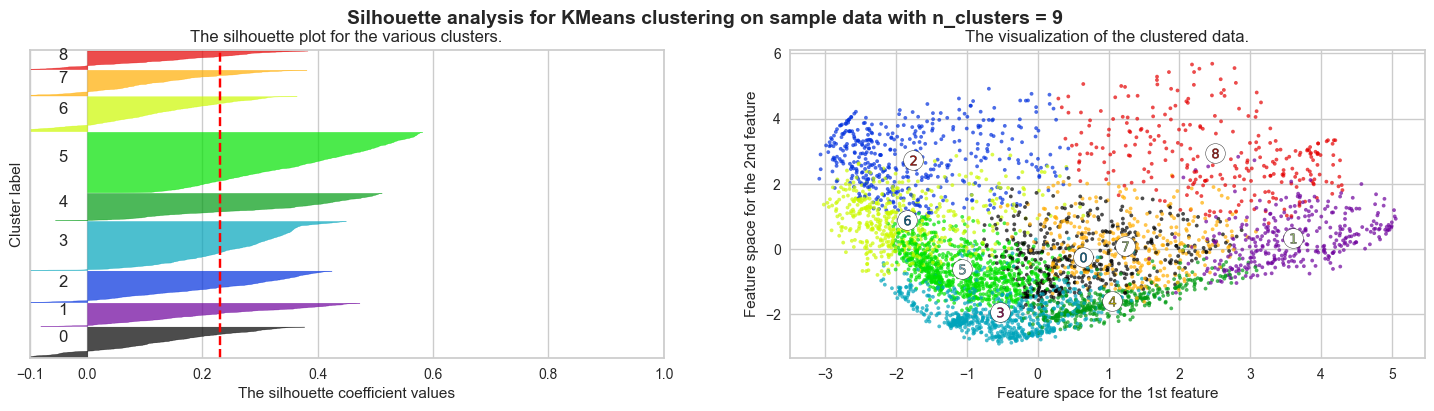

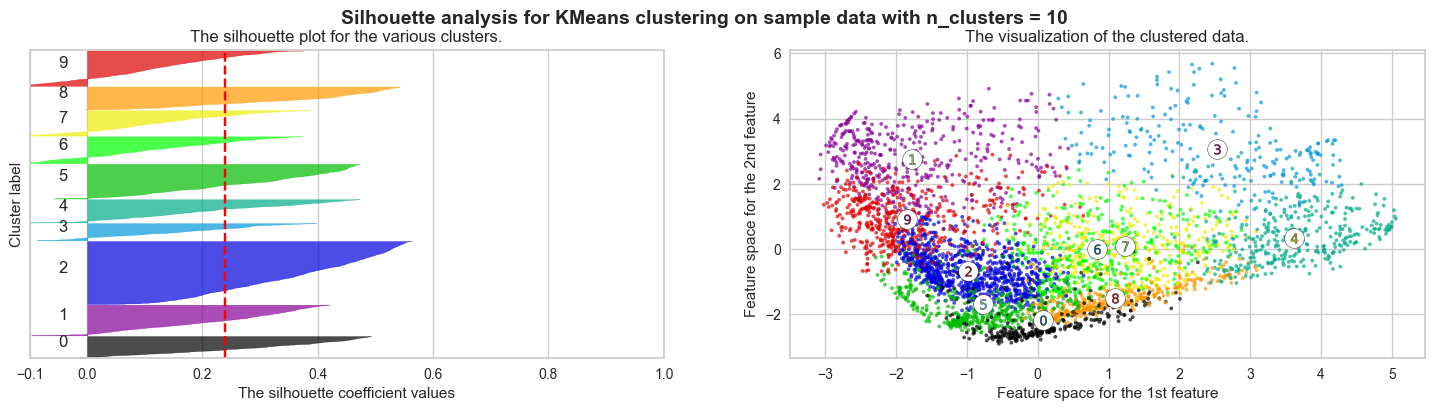

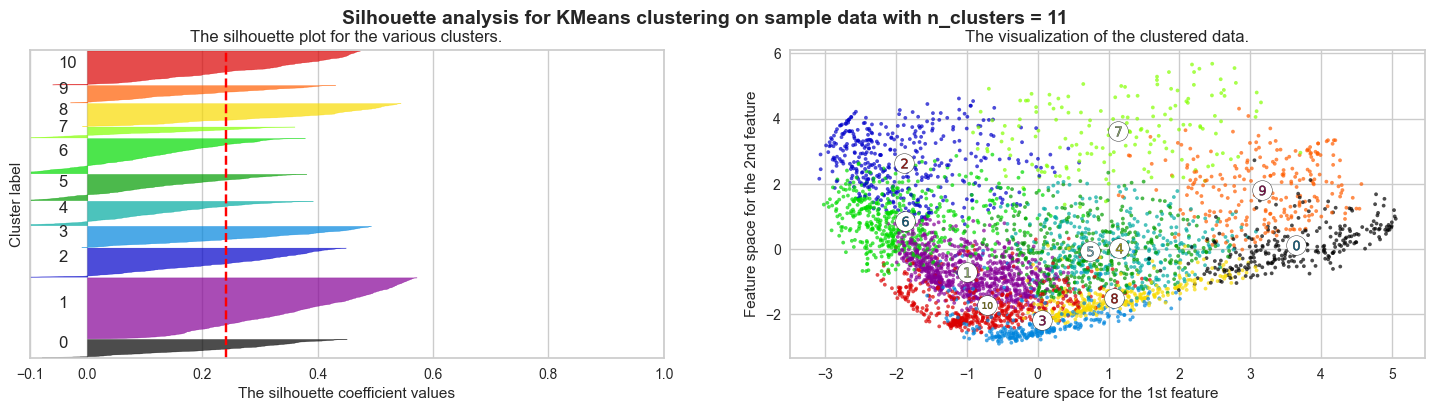

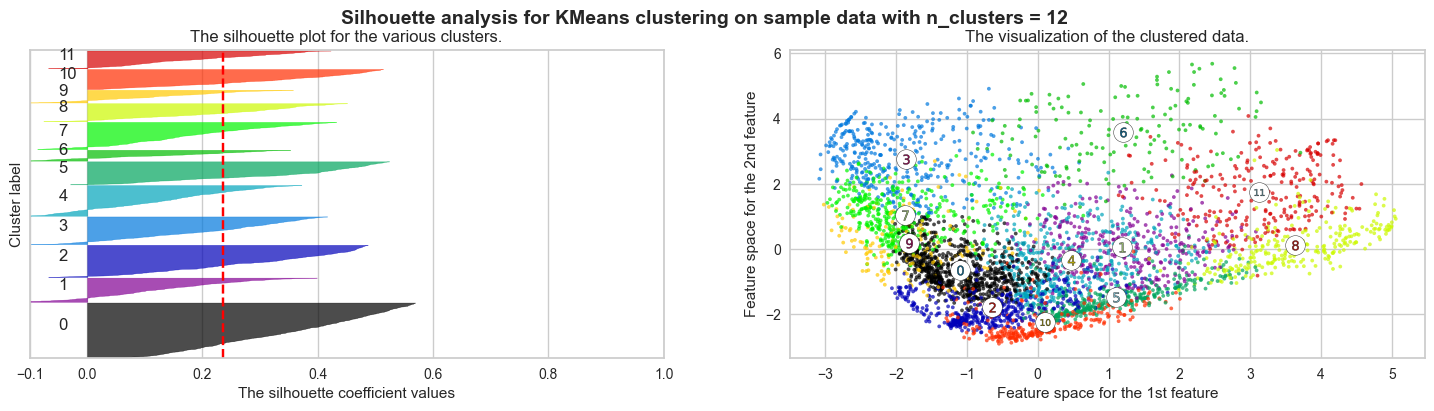

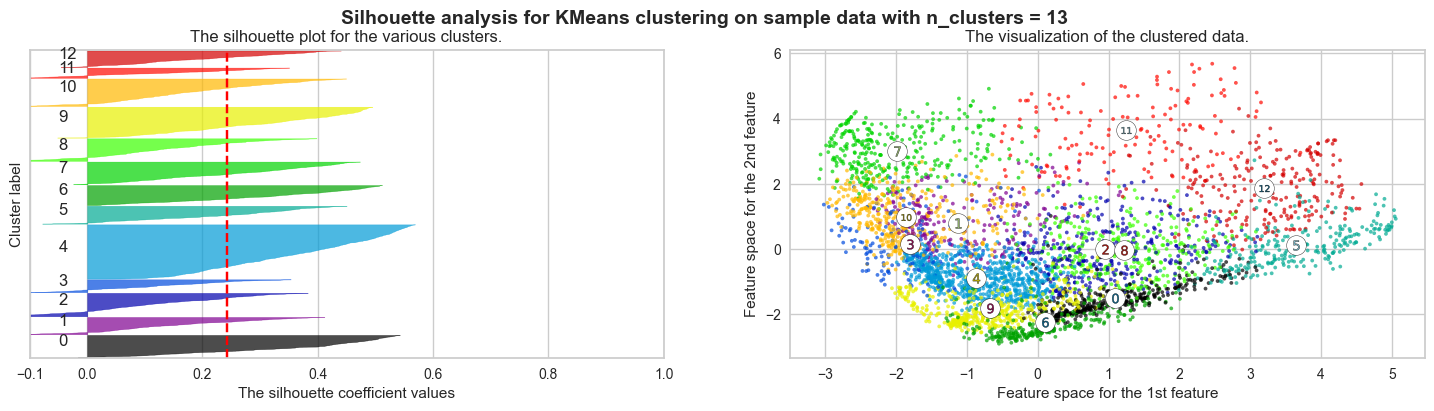

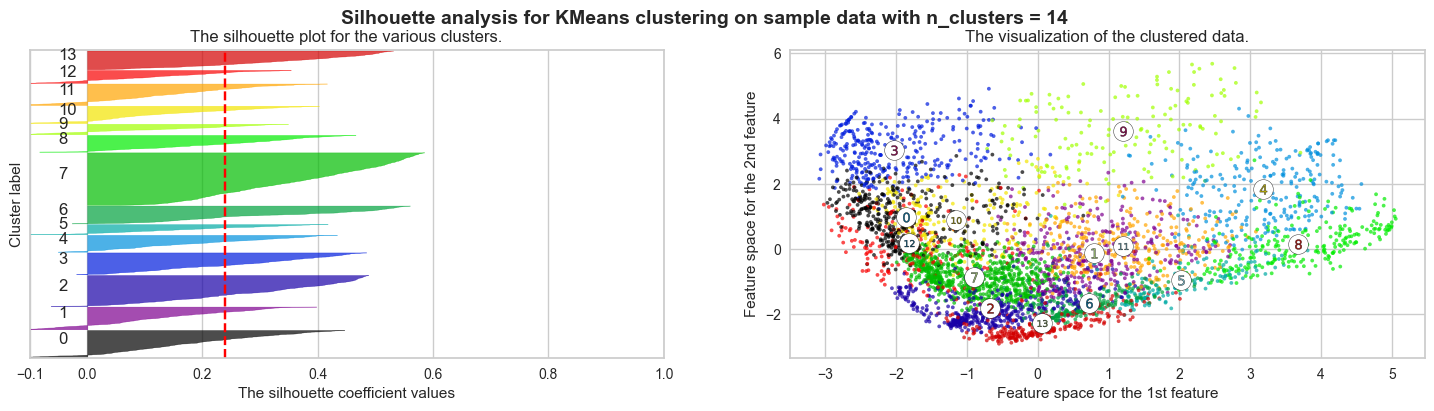

In [ ]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df_scaled_pca, random_state)

hasil silhouette plot terlihat
- cluster yang adalah proporsi data membentuk seperti pedang
- cluster yang bentuk pedang nya semakin ramping berarti proporsi data seimbang
- cluster dengan proporsi data yang terlalu banyak pedangnya semakin lebar
- cluster terdapat data bocor atau leak ketika bentuk pedangnya berlawanan dengan yang lain
- pada silhouette plot lebih dilihat data leak(outlier) dibanding proporsi data
- siluete score makin tinggi makin bagus -1 sampai 1


berdasarkan silhouette plot :
- cluster 2 terlihat 1 data leak pada cluster dan 1 cluster dengan pedang lebar yang mendominasi dengan silouette score 0.277
- cluster 3 juga ada 2 cluster yang data leak dan juga ada 1 cluster yang pedang nya lebar melebihi cluster lain dengan silouette score 0.262
- cluster 4 telihat ada 3 data leak pada clusternya dan antar cluster bentuk pedang mulai seimbang dengan silouette score 0.226
- cluster 5 terlihat ada 4 cluster yang datanya leak  dan beberapa cluster pedang seimbang dengan silouette score 0.236
- cluster 6 terlihat data leak semakin banyak walaupun bentuk pedang hampir seimbang dan silouette score menurun

dipilih cluster 4 karena data leak relatif sedikit, bentuk cluster pedang tidak begitu dan silouette score 0.226 yang mana masih dianggap tinggi


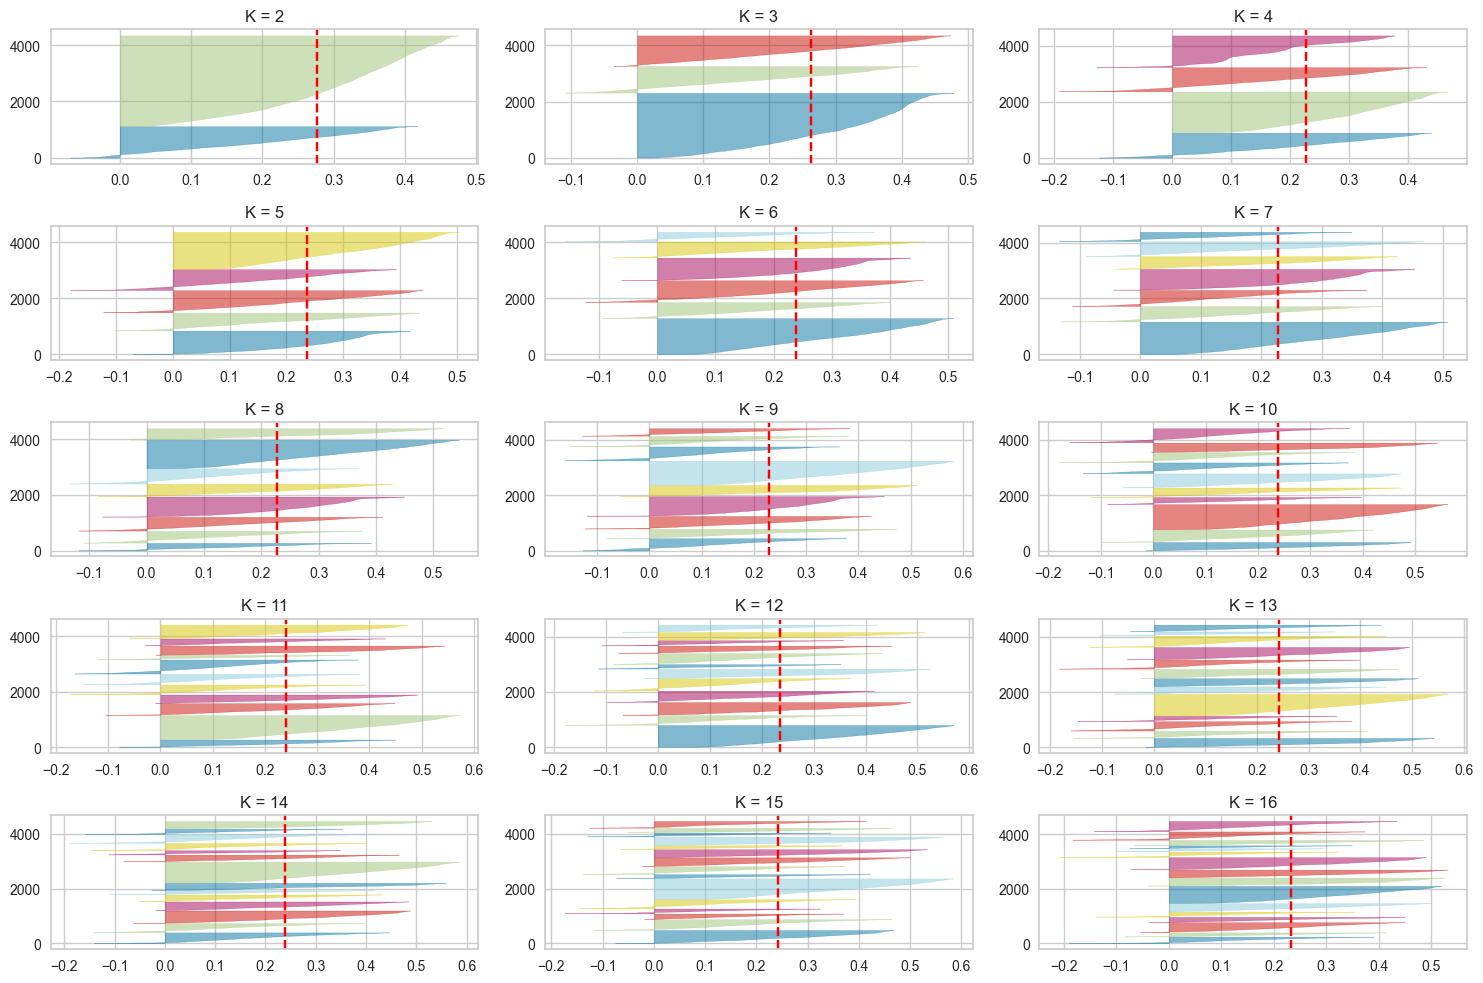

In [ ]:
# Menampilkan Nilai Silhouette Score dan Plot Silhouette Plot

fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop untuk setiap plot
for i, ax in enumerate(axes.flatten()):

    # Inisialisasi K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=random_state)

    # Membuat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Melatih visualizer dengan data
    visualizer.fit(df_scaled_pca)

    # Set judul
    ax.set_title(f'K = {n_clusters}')

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()


---

## <a id="model-definition">**8. Model Definition**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/9422/9422881.png" alt="drawing" width="64" align="center"/></a>

---

K-Means adalah algoritma clustering berbasis centroid yang bertujuan untuk membagi dataset menjadi K kelompok yang berbeda dan saling tidak tumpang tindih (hard clustering). Karakteristik utama K-Means:

Setiap kelompok memiliki sebuah centroid, yaitu titik pusat dari kelompok tersebut. Tujuannya adalah meminimalkan jarak antara titik data dan centroid kelompoknya masing-masing.

K-Means membagi dataset menjadi K kelompok, di mana setiap titik data termasuk dalam kelompok dengan centroid terdekat. K-Means merupakan algoritma hard clustering, yang berarti setiap titik data hanya akan termasuk dalam satu kelompok.

K-Means menggunakan metrik jarak untuk mengukur ketidakmiripan antara titik data dan centroid. Jarak Euclidean biasanya digunakan sebagai metrik jarak untuk K-Means.

In [ ]:
# Melatih model dengan jumlah cluster optimal

km = KMeans(n_clusters=4,         # Jumlah cluster yang optimal dari analisis Elbow atau Silhouette
            init='k-means++',     # Metode inisialisasi centroid (k-means++)
            max_iter=300,         # Jumlah iterasi maksimum dalam setiap run
            n_init=10,            # Jumlah inisialisasi centroid yang berbeda
            random_state=random_state)  # Seed untuk inisialisasi centroid yang konsisten

# Melatih model KMeans dengan data yang telah ditransformasi PCA
km.fit(df_scaled_pca)

KMeans(n_clusters=4, n_init=10, random_state=10)


---

## <a id="model-training">**9. Model Training**</a> <a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/2103/2103652.png" alt="drawing" width="64" align="center"/></a>

---

langkah yang dilakukan oleh K-Means untuk mengelompokkan dataset ke dalam cluster:

- Inisialisasi<br>
Mulai dengan memilih secara acak K centroid awal.<br>
Centroid ini dapat dipilih dari dataset itu sendiri atau dengan metode lain seperti inisialisasi acak.<br>

- Penugasan
Atribusikan setiap titik data ke cluster yang diwakili oleh centroid terdekat.<br>
Penugasan ini didasarkan pada jarak Euclidean atau metrik jarak lain yang dipilih.<br>

- Pembaruan centroid<br>
Hitung ulang centroid untuk setiap cluster sebagai rata-rata dari semua titik data yang saat ini ditugaskan ke cluster tersebut.<br>

- Ulangi Langkah 2 dan 3 <br>
Ulangi langkah penugasan dan pembaruan centroid secara iteratif sampai salah satu kriteria berhenti terpenuhi.<br>
Kriteria berhenti umum meliputi jumlah iterasi tetap, konvergensi centroid, atau ambang batas yang telah ditentukan.<br>

- cluster Akhir <br>
Setelah konvergensi, algoritma menghasilkan K cluster, di mana setiap titik data ditugaskan ke salah satu cluster ini berdasarkan centroid akhir.<br>

In [ ]:
pred = km.fit_predict(df_scaled_pca)
pred

array([1, 3, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
df_credit['cluster'] = pred  # Menyisipkan hasil clustering ke dalam kolom 'cluster' pada DataFrame df_credit

# Menampilkan DataFrame df_credit yang telah diperbarui dengan kolom cluster
df_credit

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2        6075   757.964752              0.875      157.4             157.4   
3        6291   264.566591              0.375     1150.0            1150.0   
4        7755   440.613643              1.000      600.0             600.0   
5        8299   611.561026              1.000      765.0             765.0   
7        8805   105.333584              0.375      306.0             306.0   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000        0.0               0.0   
4471     6785  1040.030221              1.000        0.0               0.0   
4472     7347  1322.818587              1.000        0.0               0.0   
4473     8447  1060.391273              1.000        0.0               0.0   
4474     1995  3447.674222              1.000      205.0             205.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
5                        0.0      0.000000             0.125000   
7                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
5                       0.125000                               0.0   
7                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
5                   0.000000                 0              1        2000.0   
7                   0.000000                 0              2        6000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
2     1494.480376       2638.598410               0.0       8        1  
3     3029.380326         85.428885               0.0       8        3  
4      215.316424        137.846006               0.0       8        1  
5      204.464151        146.352314               0.0       8        1  
7      101.986927        118.324082               0.0       8        3  
...           ...               ... 

## 10. EDA II (Exploratory Data Analysis)

EDA II dilakukan setelah pembuatan model clustering untuk untuk mengidentifikasi karakteristik dari setiap cluster yang terbentuk.

In [ ]:
df_credit['cluster'].value_counts()

cluster
1    1457
3    1122
0     885
2     856
Name: count, dtype: int64

In [ ]:
# Mengelompokkan berdasarkan cluster dan menghitung rata-rata
df_kmeans = df_credit.groupby('cluster').mean().iloc[:, :5]
df_kmeans


CUST_ID      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
cluster                                                             
0        4342.405650  3731.965016           0.954491   322.256395   
1        4559.936170  1207.418957           0.994061   360.373542   
2        4443.464953  1975.194248           0.979276  3627.632033   
3        4497.598930   150.908384           0.654505   459.046283   

         ONEOFF_PURCHASES  
cluster                    
0              197.047164  
1              173.324036  
2             2344.212500  
3              175.969563

<Axes: xlabel='cluster', ylabel='PAYMENTS'>

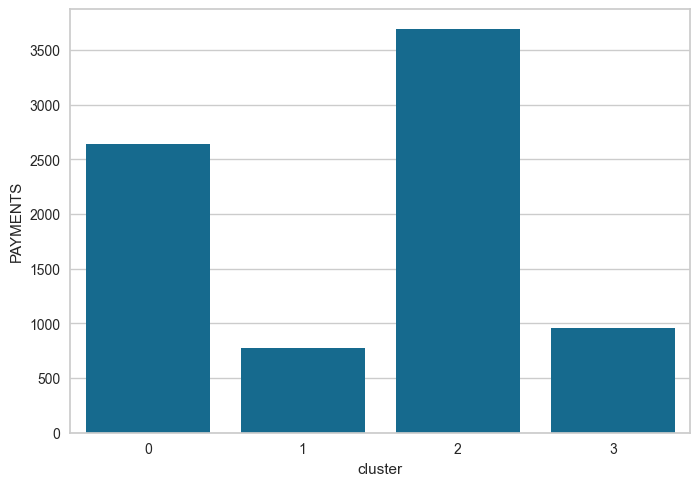

In [ ]:
sns.barplot(df_credit.groupby('cluster')['PAYMENTS'].mean())

pada variabel PAYMENTS cluster 3 memiliki rata2 tertinggi 

<Axes: xlabel='cluster', ylabel='PURCHASES'>

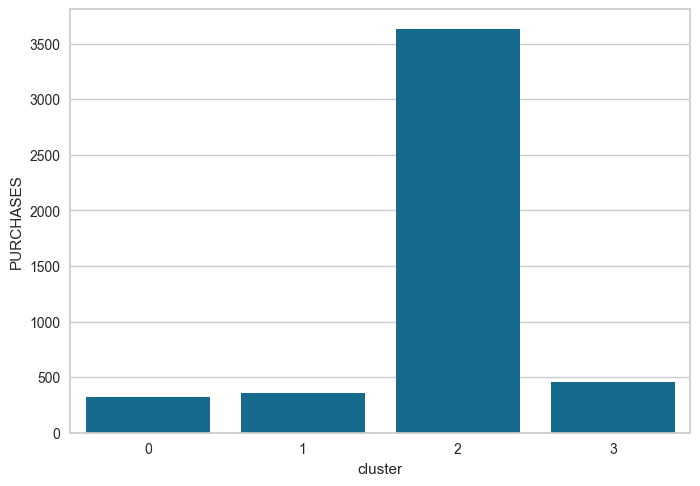

In [ ]:
sns.barplot(df_credit.groupby('cluster')['PURCHASES'].mean())

pada variabel PURCHASES cluster 3 memiliki rata2 tertinggi 

<Axes: xlabel='cluster', ylabel='BALANCE'>

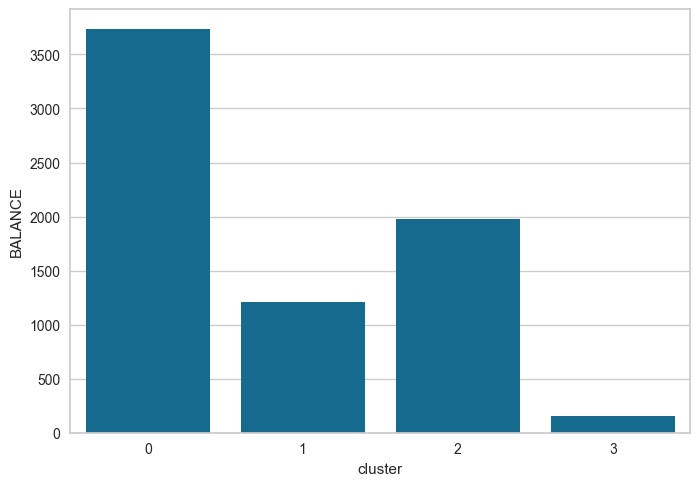

In [ ]:
sns.barplot(df_credit.groupby('cluster')['BALANCE'].mean())

pada variabel BALANCE cluster 1 memiliki rata2 tertinggi

<Axes: xlabel='cluster', ylabel='CREDIT_LIMIT'>

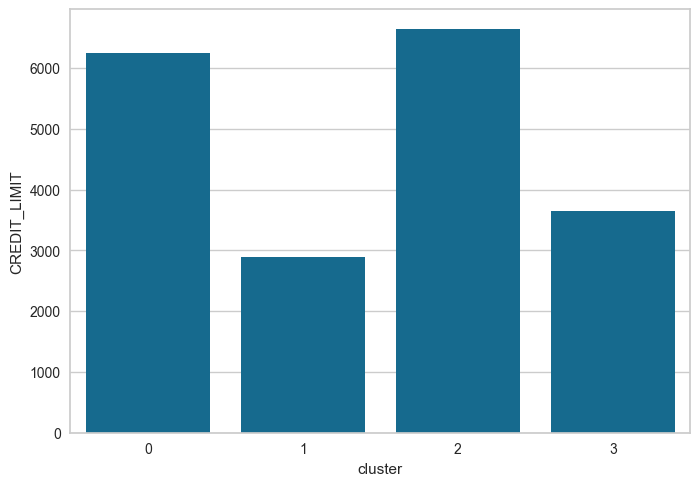

In [ ]:
sns.barplot(df_credit.groupby('cluster')['CREDIT_LIMIT'].mean())

pada variabel CREDT_LIMIT cluster 3 memiliki rata2 tertinggi

<Axes: xlabel='cluster', ylabel='CASH_ADVANCE'>

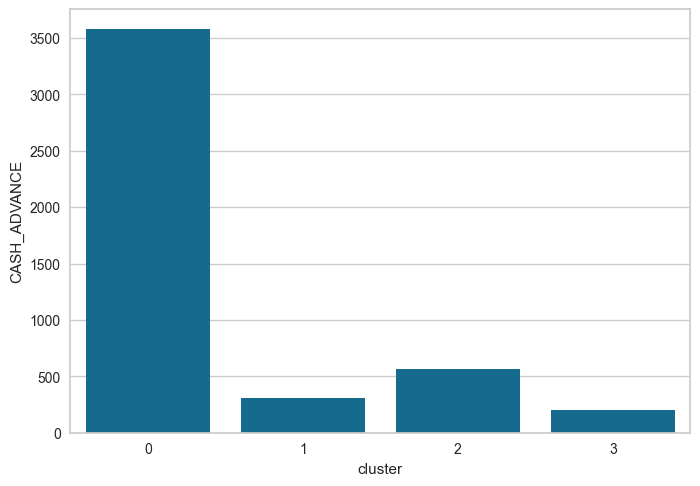

In [ ]:
sns.barplot(df_credit.groupby('cluster')['CASH_ADVANCE'].mean())

pada variabel CASH_ADVANCE cluster 1 memiliki rata2 tertinggi

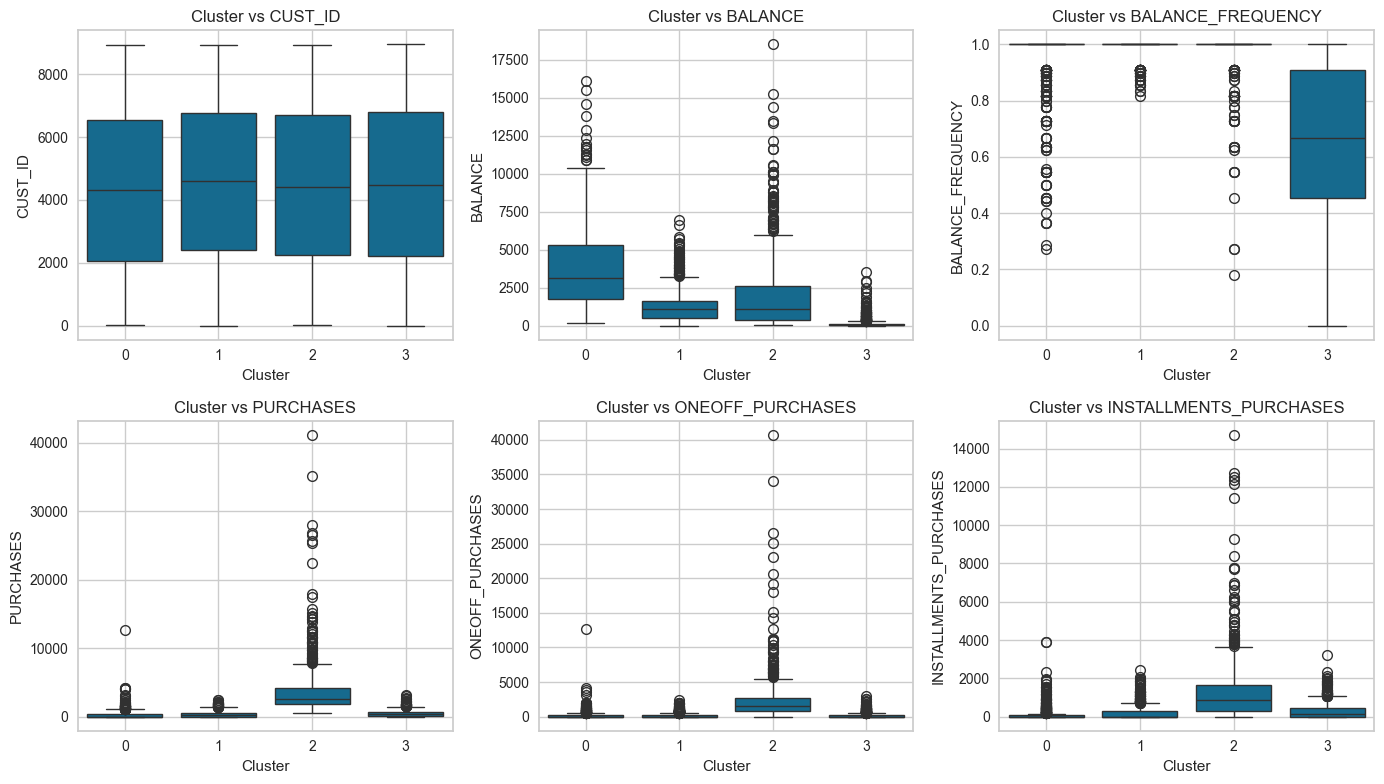

In [ ]:

df_col = df_credit.columns.tolist()  # Mendapatkan daftar kolom dari DataFrame

# Membuat subplot dengan 2 baris dan 3 kolom untuk plot boxplot
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()  # Mengubah array 2D menjadi array 1D

# Loop untuk membuat boxplot untuk setiap kolom (maksimal 6 kolom)
for ax, col in zip(axes, df_col[:6]):  # Memperbarui ini untuk menyesuaikan dengan jumlah kolom
    sns.boxplot(x=df_credit["cluster"], y=df_credit[col], ax=ax)
    ax.set_title(f'Cluster vs {col}') 
    ax.set_xlabel('Cluster') 
    ax.set_ylabel(col)  
    ax.grid(True)  

plt.tight_layout()  
plt.show()  

diketahui dari gambar pada setiap variabel dengan clusternya hampir semua boxplot nya berjejer menandakan distribusi sama berarti clusteringnya kurang maksimal 



---

## <a id="model-saving">**11. Model Saving**</a><a style="float:right; margin-right: 15px"><img src="https://cdn-icons-png.flaticon.com/512/1004/1004755.png" alt="drawing" width="64" align="center"/></a>


---

In [ ]:
# Simpan scaler
with open('scaler.pkl', 'wb') as file_1:
    pickle.dump(scaler, file_1)

# Simpan pca
with open('pca.pkl', 'wb') as file_2:
    pickle.dump(pca, file_2)

# Simpan model KMeans
with open('model.pkl', 'wb') as file_3:
    pickle.dump(km, file_3)